# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [22]:
from math import atan2

def cal_angle(p0, p):
    y = p0[1] - p[1]
    x = p0[0] - p[0]
    angle = atan2(y, x)
    return angle

def cal_dis(p0, p):
    y = p0[1] - p[1]
    x = p0[0] - p[0]
    dis = x**2 + y**2
    return dis

def find_start_point(points):
    start_point_num = None
    for i, (x, y) in enumerate(points):
        if start_point_num is None or y < points[start_point_num][1]:
            start_point_num = i
        if y == points[start_point_num][1] and x < points[start_point_num][0]:
            start_point_num = i
    start_point = points[start_point_num]
    return start_point

def bubbleSort(aList, points):
    hasExchanged = True
    passes = len(aList) - 1

    while passes > 0 and hasExchanged:
        hasExchanged = False
        for i in range(passes):
            if aList[i] > aList[i + 1]:
                hasExchanged = True
                aList[i], aList[i + 1] = aList[i + 1], aList[i]
                points[i], points[i + 1] = points[i + 1], points[i]
        passes = passes - 1
    return points

def det(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) \
           - (p2[1] - p1[1]) * (p3[0] - p1[0])

def grahamscan(inputSet):
    spoint = find_start_point(inputSet)
    angle_list = []
    for i in inputSet:
        angle = cal_angle(i, spoint)
        angle_list.append(angle)
    sorted = bubbleSort(angle_list, inputSet)
    del inputSet[inputSet.index(spoint)]
    outputSet = [spoint, sorted[0]]
    for i in sorted[1:]:
        while det(outputSet[-2], outputSet[-1], i) <= 0:
            del outputSet[-1]
        outputSet.append(i)
    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [13]:
import random
from math import pi, sin, cos

#code for random data generation
def create_points(n):
    random_points = [(random.randrange(0, 32767), random.randrange(0, 32767)) for i in range(n)]
    return random_points

#code for worst case data generation
def point(h, k, r):
    theta = random.random() * 2 * pi
    return int(h + cos(theta) * r), int(k + sin(theta) * r)
    
worstPoints = [(point(16383,16383,16383)) for i in range(100)]

Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [24]:
import timeit

#test code

IndexError: list index out of range

*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

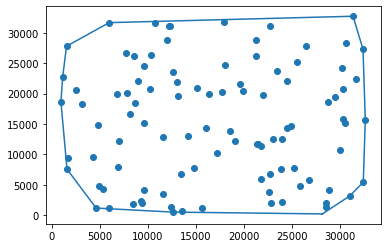

In [23]:
import matplotlib.pyplot as plt

inputSet = create_points(100)
outputSet = grahamscan(inputSet)

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 